# Setup Google CoLab Environment

In [35]:
# Import data on Google CoLab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks/2.\ Autoencoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/2. Autoencoder


# Importing relevant functions and libraries

In [0]:
%run "Reusable_Functions.ipynb"

# Motivation to using Autoencoders

Autoencoder are good at:
- **dimensionality reduction** for data visualization
- **data denoising** for robust feature learning

Thus the motivation is to use Z-space of autoencoders as Path Descriptors of coupler curves.

# Import Data

In [37]:
# Import data offline
cplr, mech = import_DB()
print(cplr.shape)
print(mech.shape)

(1902, 100, 3)
(1902, 11, 3)


In [0]:
# Renormalize DB from range [-1,1] to range [0,1] 
n_cplr=cplr/2+.5
n_mech=mech/2+.5

# Splitting the database in Train/Test dataset

In [39]:
x= n_cplr

# Split data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(x, x, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

(1521, 100, 3)
(381, 100, 3)


# 1. Effect of activation func: Sigmoid vs RELU vs LeakyRELU

First we try to find which activation function might perform better for our usecase i.e. describing 3D coupler paths. Each model is trained 10 times for upto 1000 epochs. Training ends when the validation loss fails to decerease for 10 epochs.  The training stastics and the best fit model results are reported.

## 1.1 Autoencoder Sigmoid activation

Model no. 1
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00871: early stopping
Model no. 3
Model no. 4
Model no. 5
Model no. 6
Model no. 7
Model no. 8
Model no. 9
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00972: early stopping
**************************************************
Validation Loss Stastics:
Values: [0.0304, 0.0316, 0.0301, 0.0301, 0.0289, 0.0308, 0.03, 0.0301, 0.0306, 0.0307]
Mean: 0.0303
Standard Deviation: 0.0007
**************************************************
Model: "model_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_145 (InputLayer)       (None, 100, 3)            0         
_________________________________________________________________
flatten_145 (Flatten)        (None, 300)               0         
_________________________________________________________________
dense_1085 (Dense)           (None, 100)   

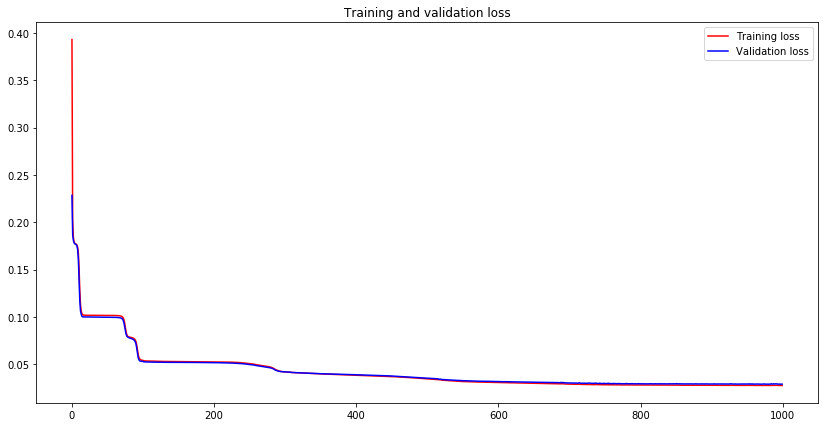

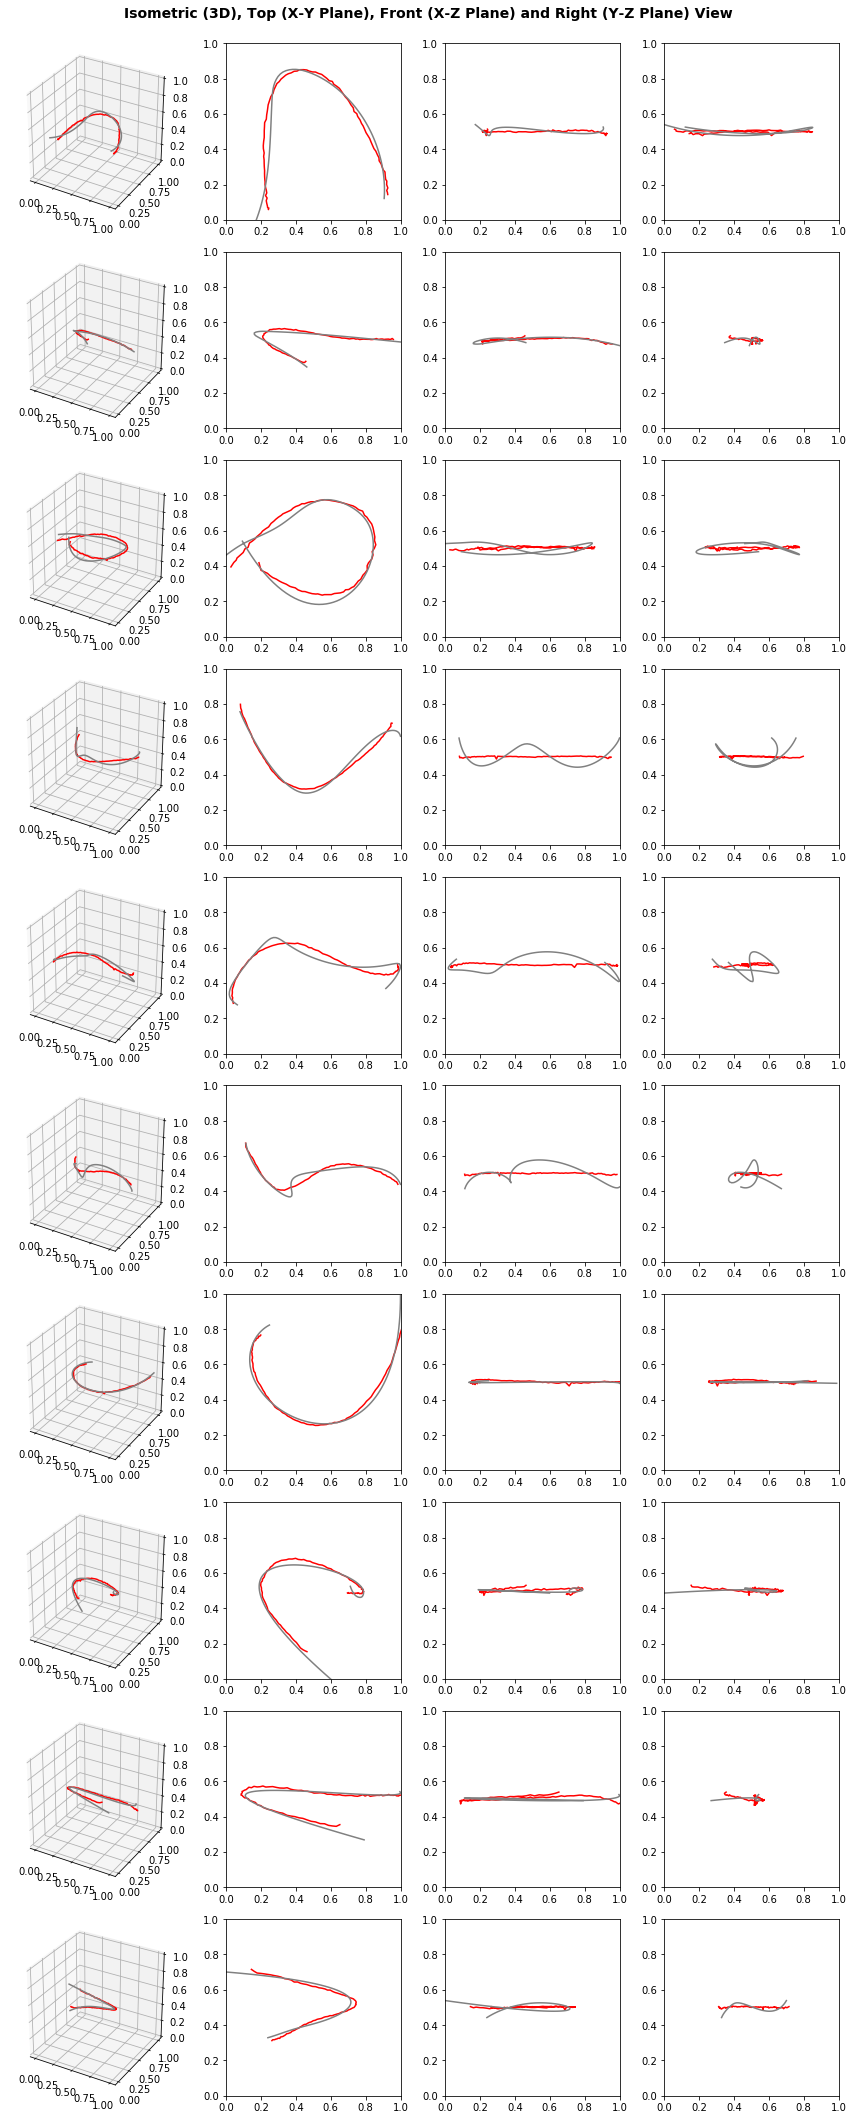

In [40]:
AE,E,train_data =AE_analysis(aeSig, 10, x_train, x_test, filename='Sig')
visualize_AE(AE, train_data, x_test)

# Tanh

## 1.2 Autoencoder RELU activation

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00352: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00351: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00291: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00311: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00153: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00230: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00321: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00237: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00279: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00394: early stopping
*************************************************

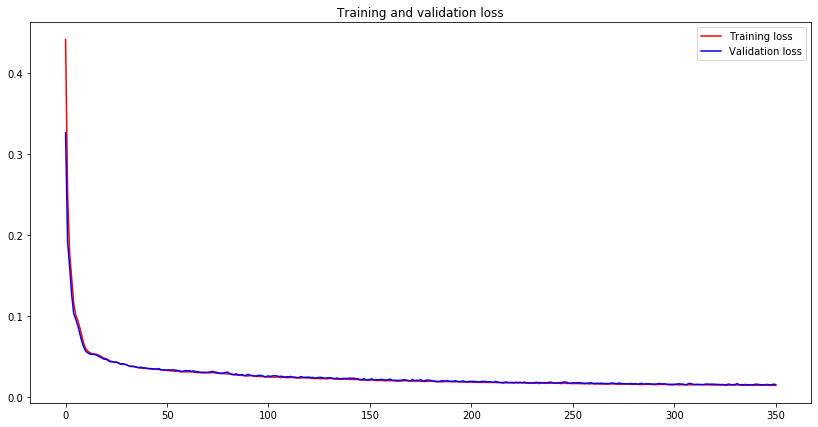

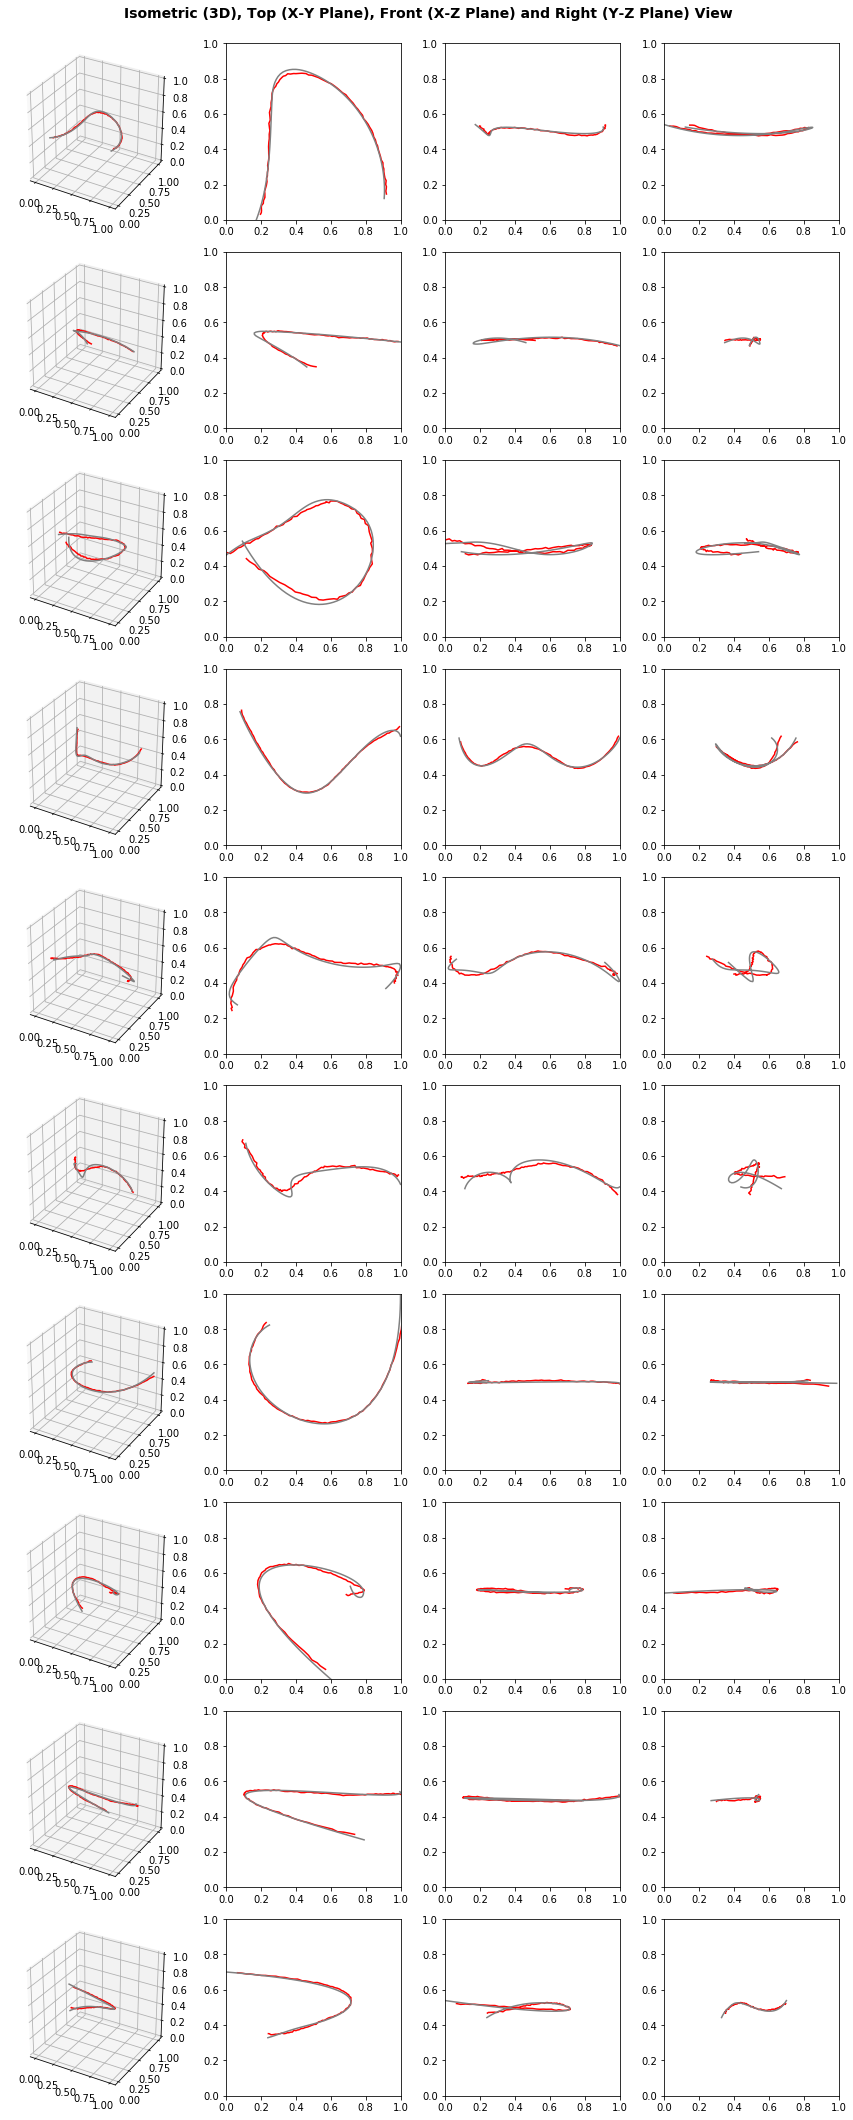

In [41]:
AE,E,train_data =AE_analysis(aeRELU, 10, x_train, x_test, filename='RELU')
visualize_AE(AE, train_data, x_test)

## 1.3 Autoencoder LeakyRELU activation

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00433: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00394: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00439: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00215: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00208: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00302: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00456: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00280: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00309: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00397: early stopping
*************************************************

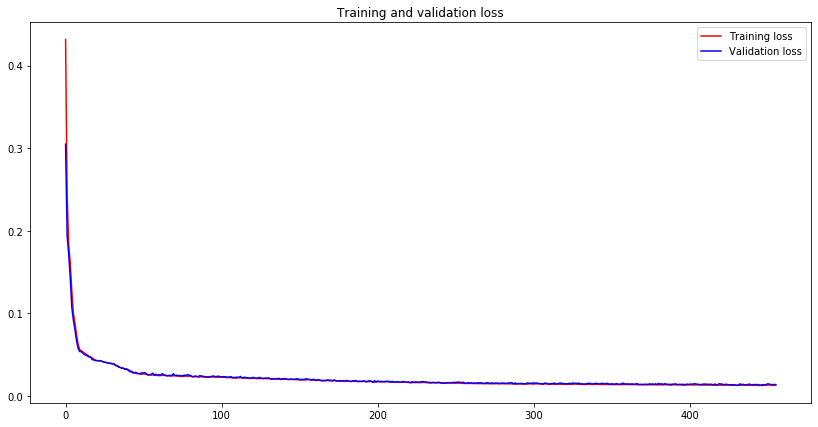

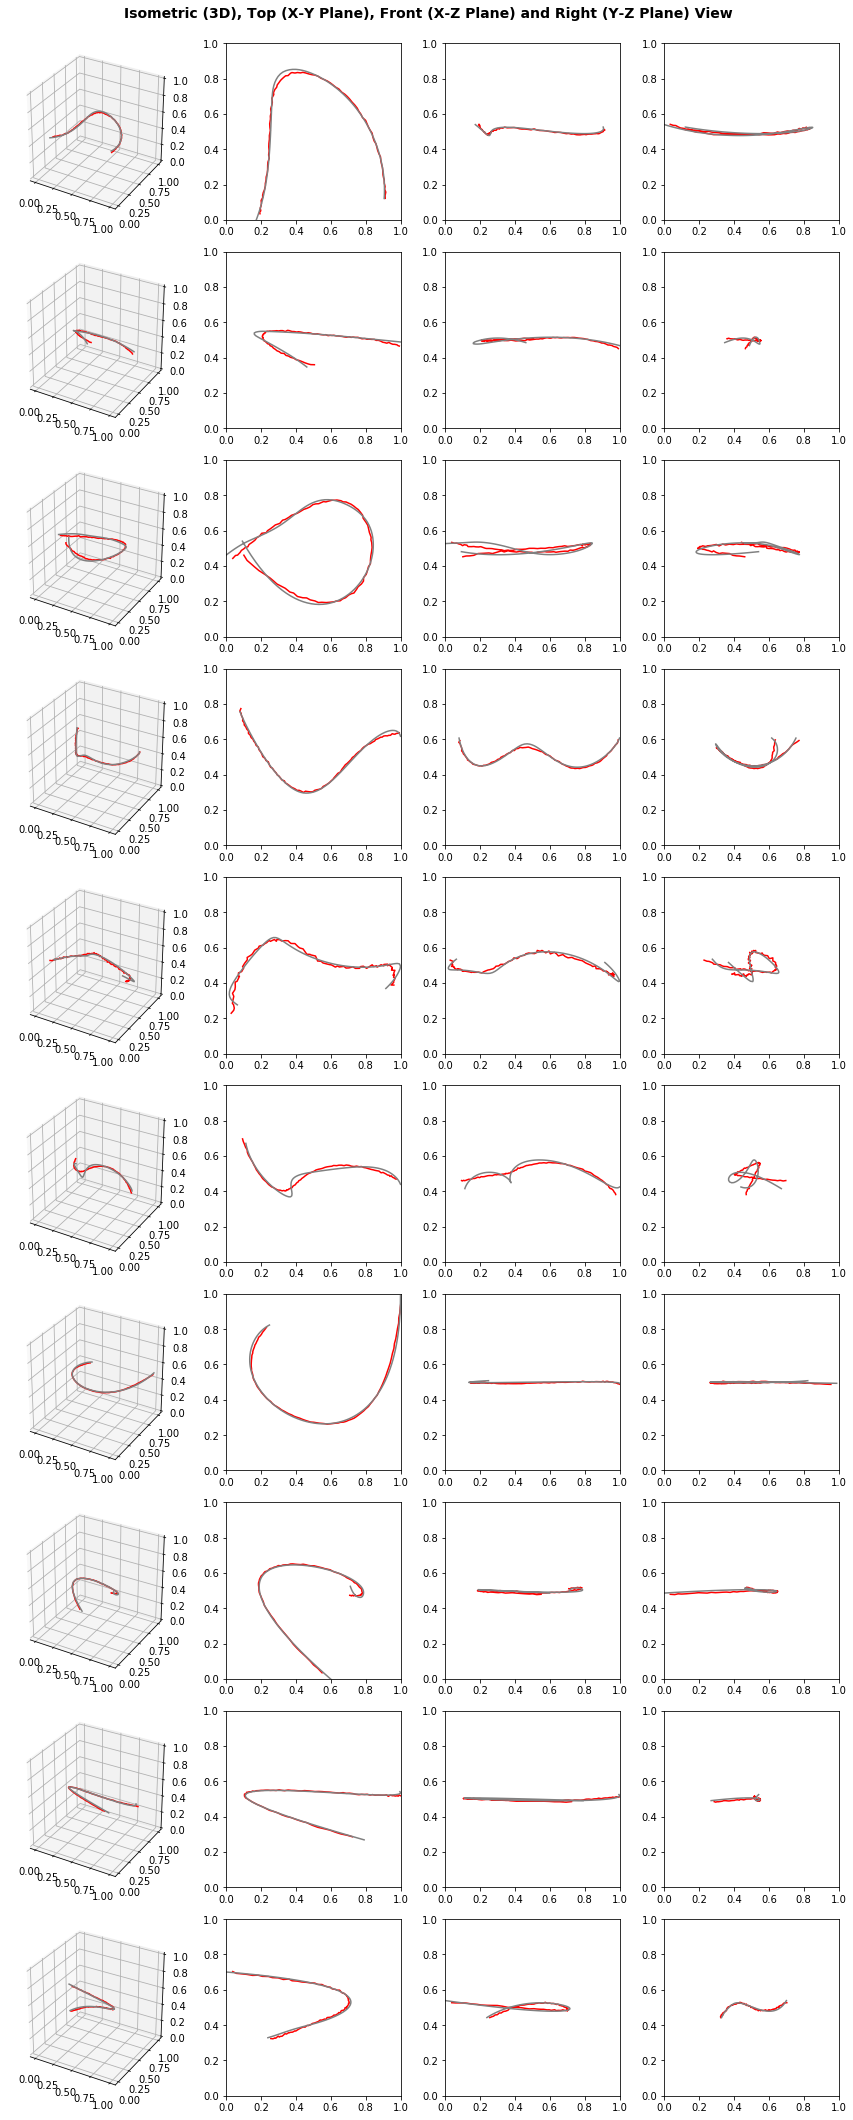

In [42]:
AE,E,train_data =AE_analysis(aeLRELU, 10, x_train, x_test, filename='LRELU')
visualize_AE(AE, train_data, x_test)

# 2. Effect of Latent space Z=2,3,10,15,30,60,300 on Dense Auto-Encoders

The nodes in Z-space determines the dimensionity reduction carried out by an auto-encoder. However, if the z-space is too small, the accuracy of reconstruction is adversely affected. Thus, we carry an emperical analysis to find the best accuracy-dimentionality tradeoff.

## 2.1 Autoencoder Z=2

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00276: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00216: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00249: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00432: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00322: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00036: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00307: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00038: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00341: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00452: early stopping
*************************************************

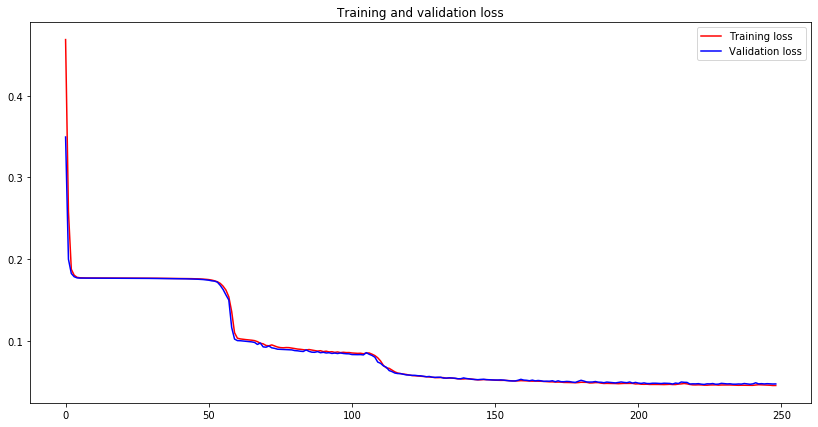

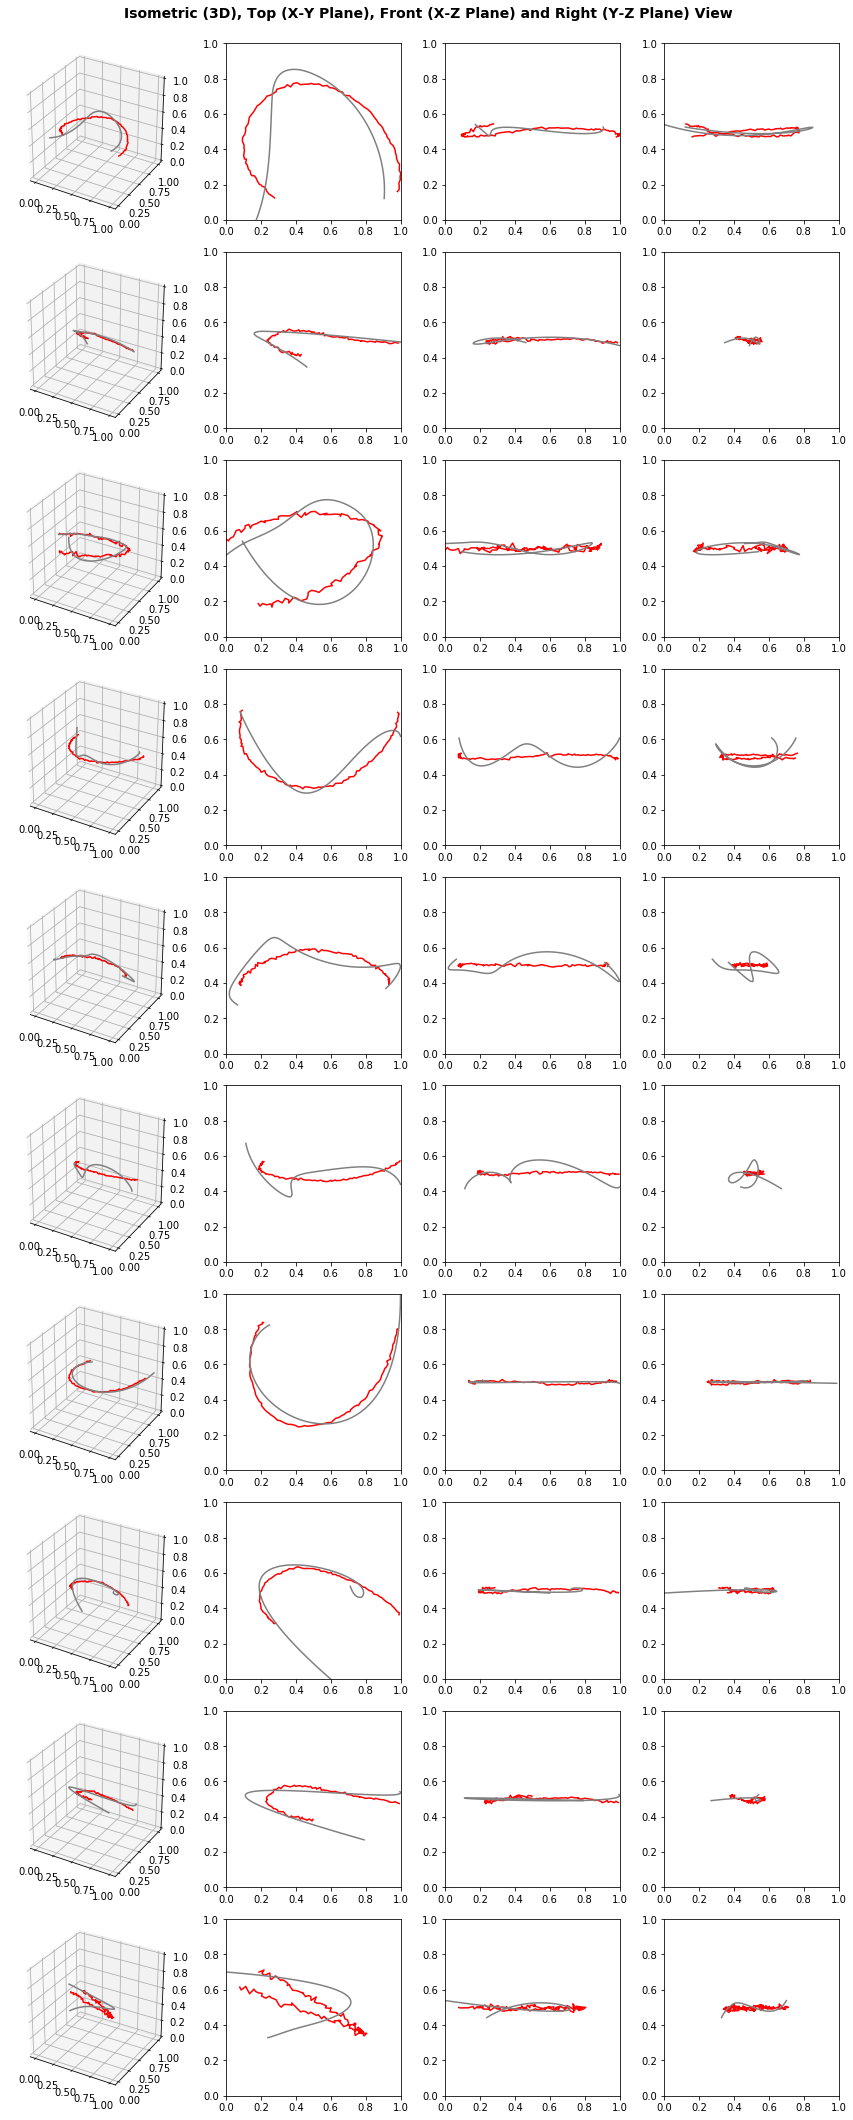

In [43]:
AE,E,train_data =AE_analysis(aeZ2, 10, x_train, x_test, filename='Z2')
visualize_AE(AE, train_data, x_test)

## 2.2 Autoencoder Z=3

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00488: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00385: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00264: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00313: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00387: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00456: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00268: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00578: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00294: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00353: early stopping
*************************************************

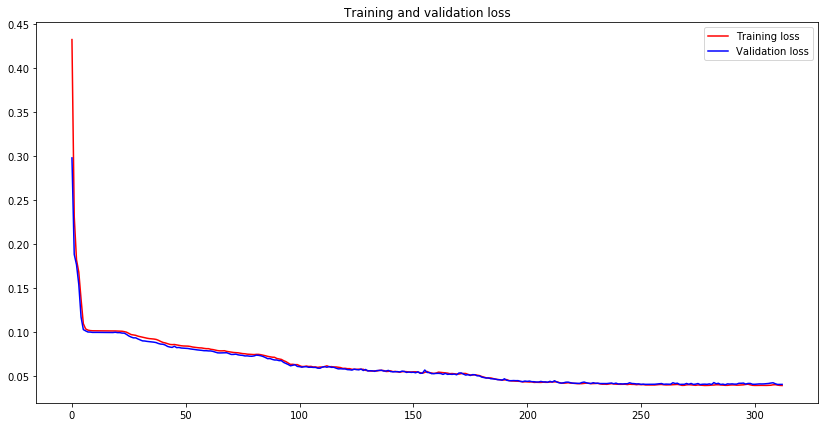

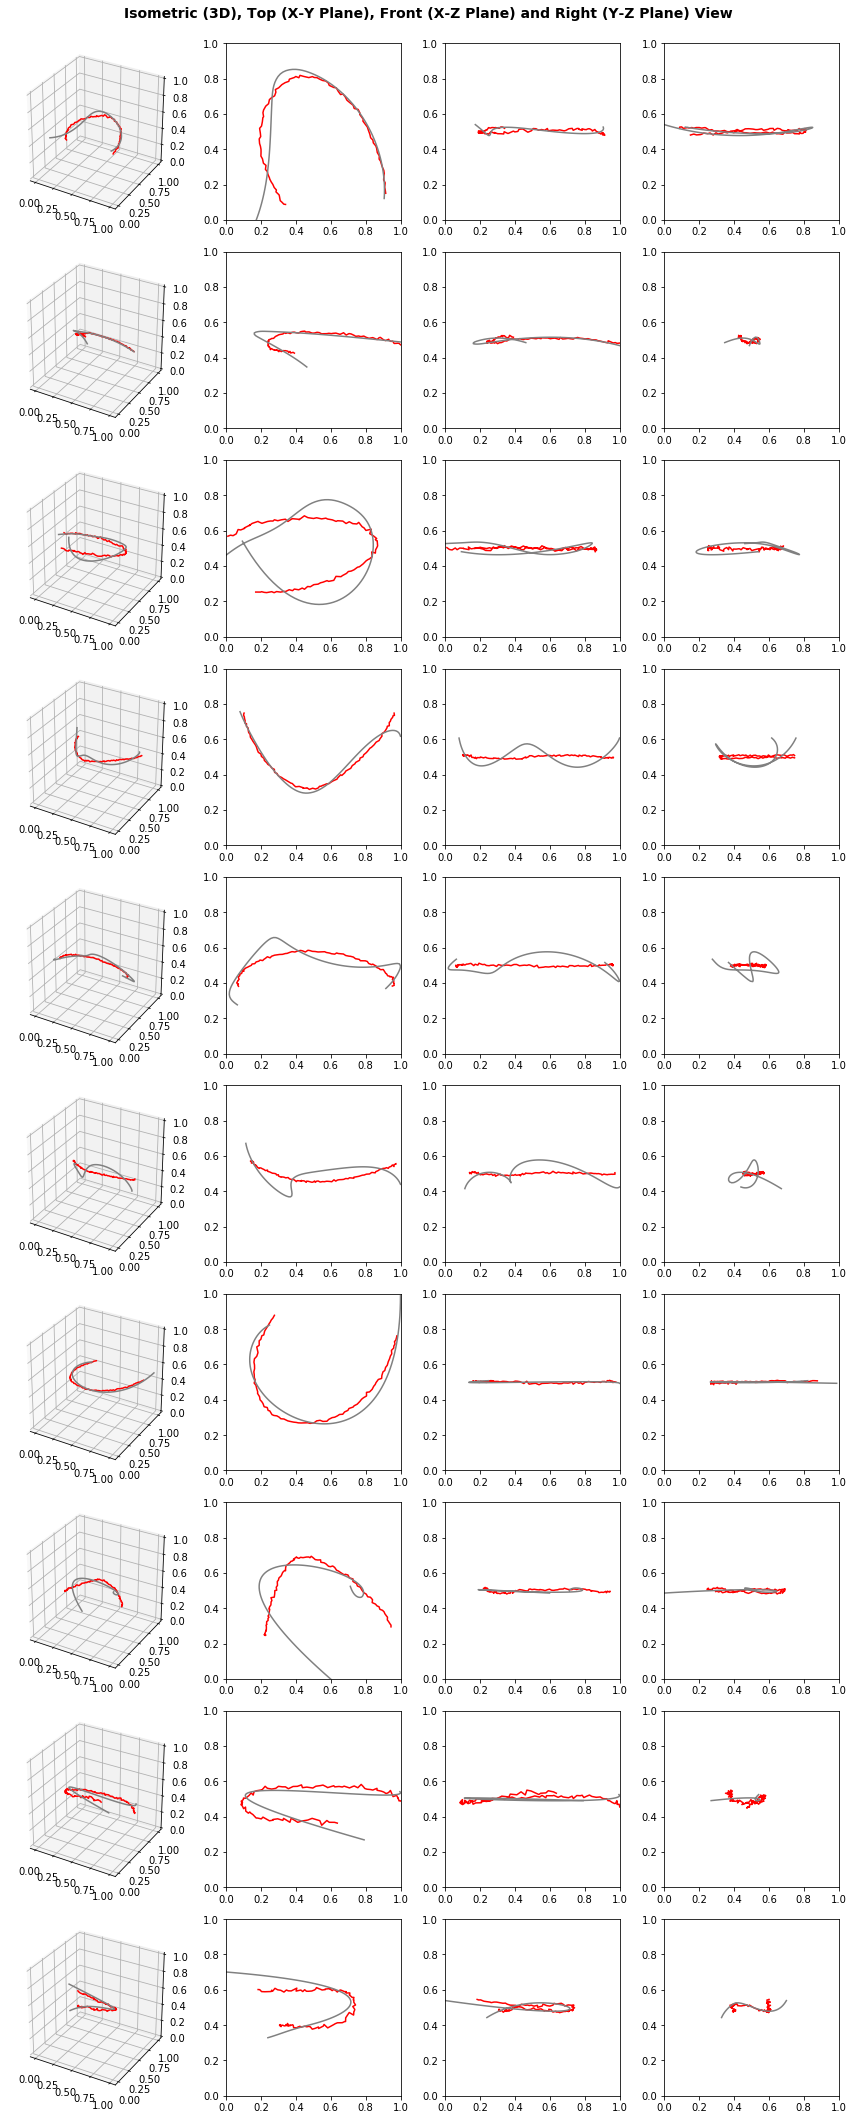

In [44]:
AE,E,train_data =AE_analysis(aeZ3, 10, x_train, x_test, filename='Z3')
visualize_AE(AE, train_data, x_test)

## 2.3 Autoencoder Z=10

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00143: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00211: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00430: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00215: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00240: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00289: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00195: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00148: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00199: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00312: early stopping
*************************************************

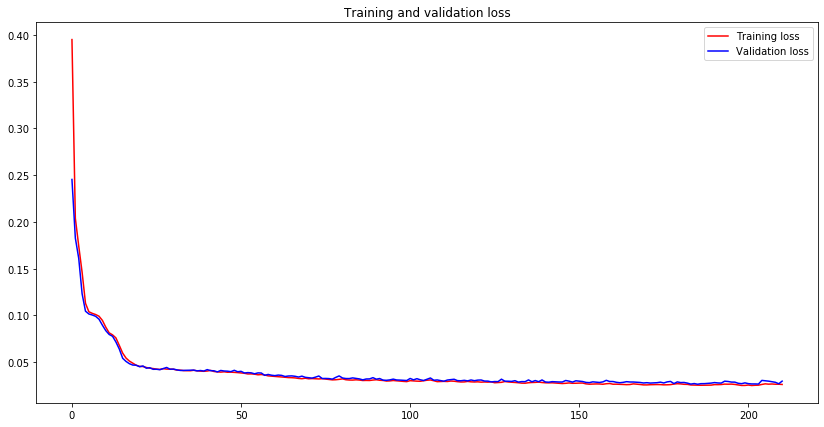

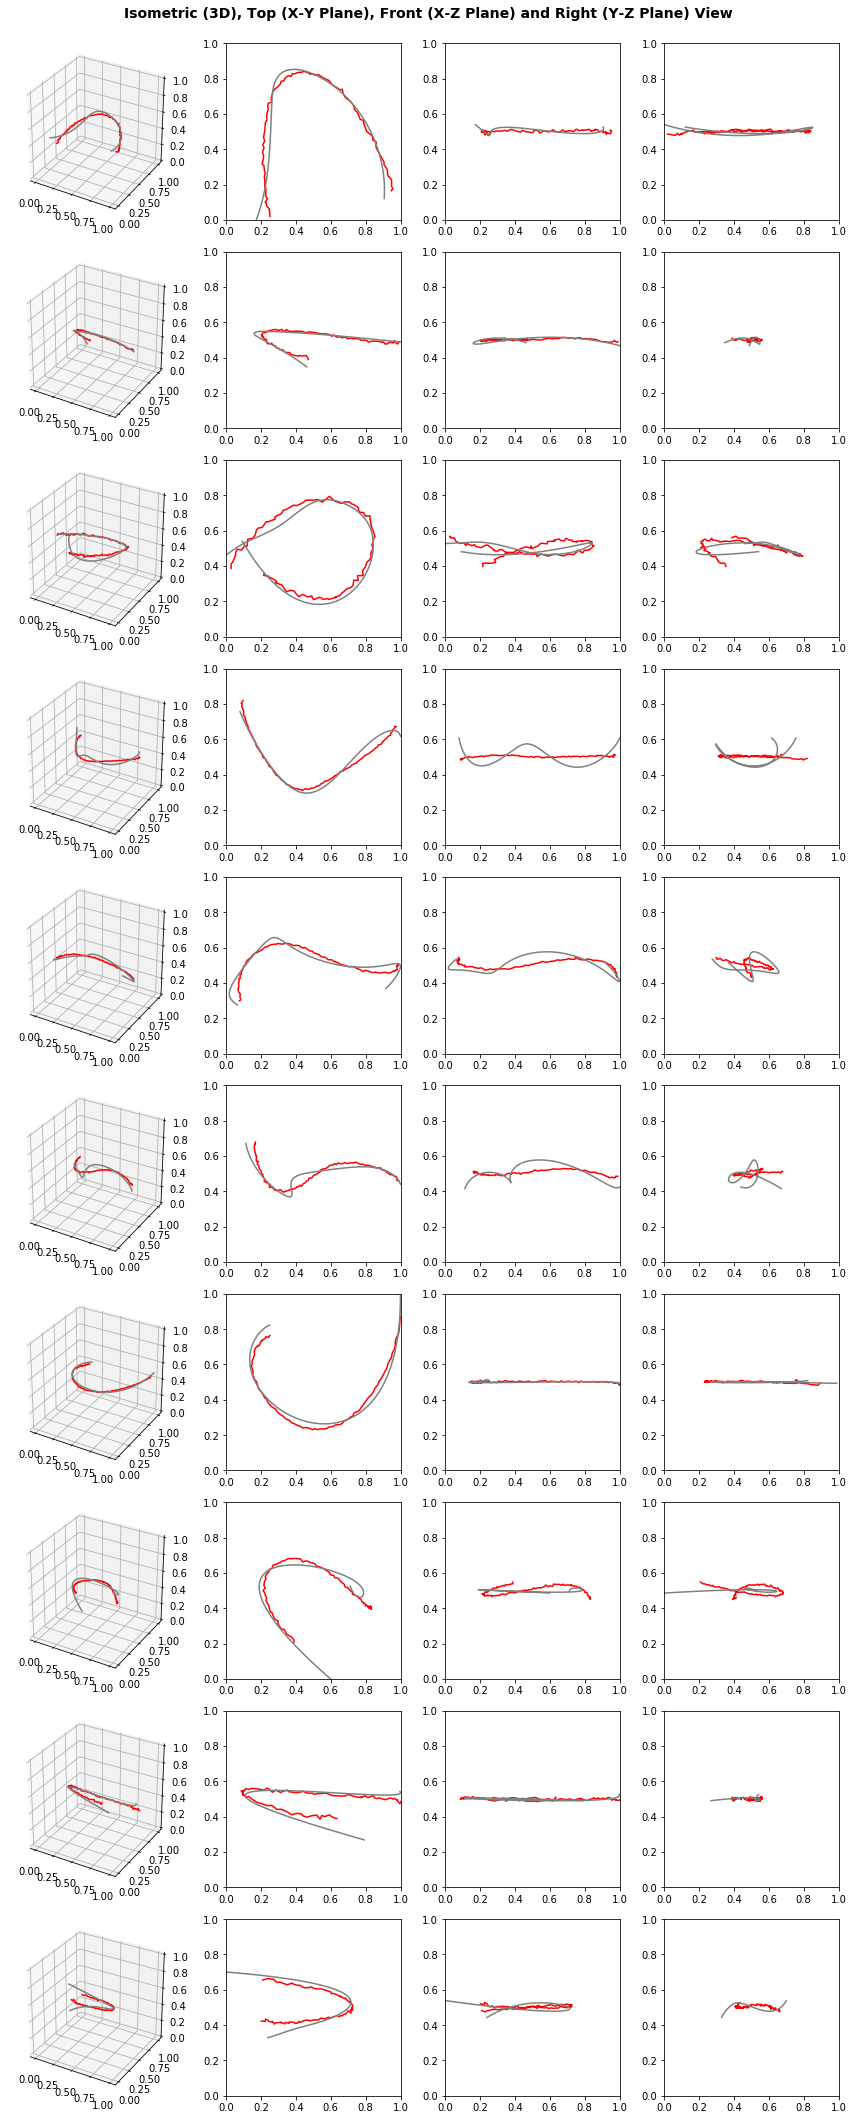

In [45]:
AE,E,train_data =AE_analysis(aeZ10, 10, x_train, x_test, filename='Z10')
visualize_AE(AE, train_data, x_test)

## 2.4 Autoencoder Z=15

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00155: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00250: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00206: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00538: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00187: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00186: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00169: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00109: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00133: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00180: early stopping
*************************************************

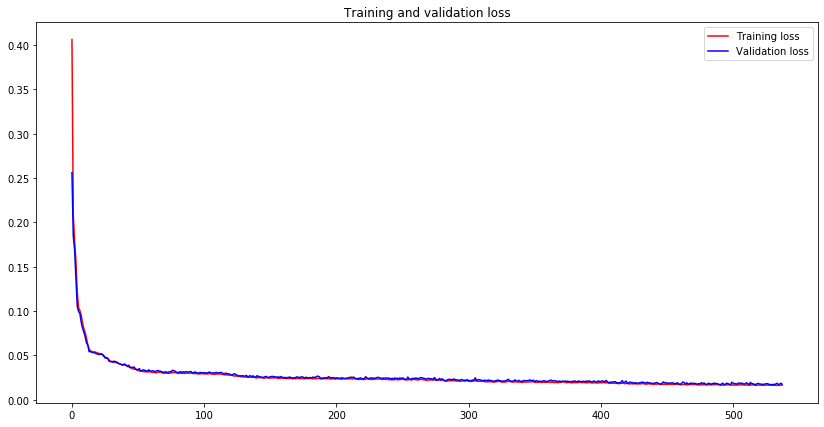

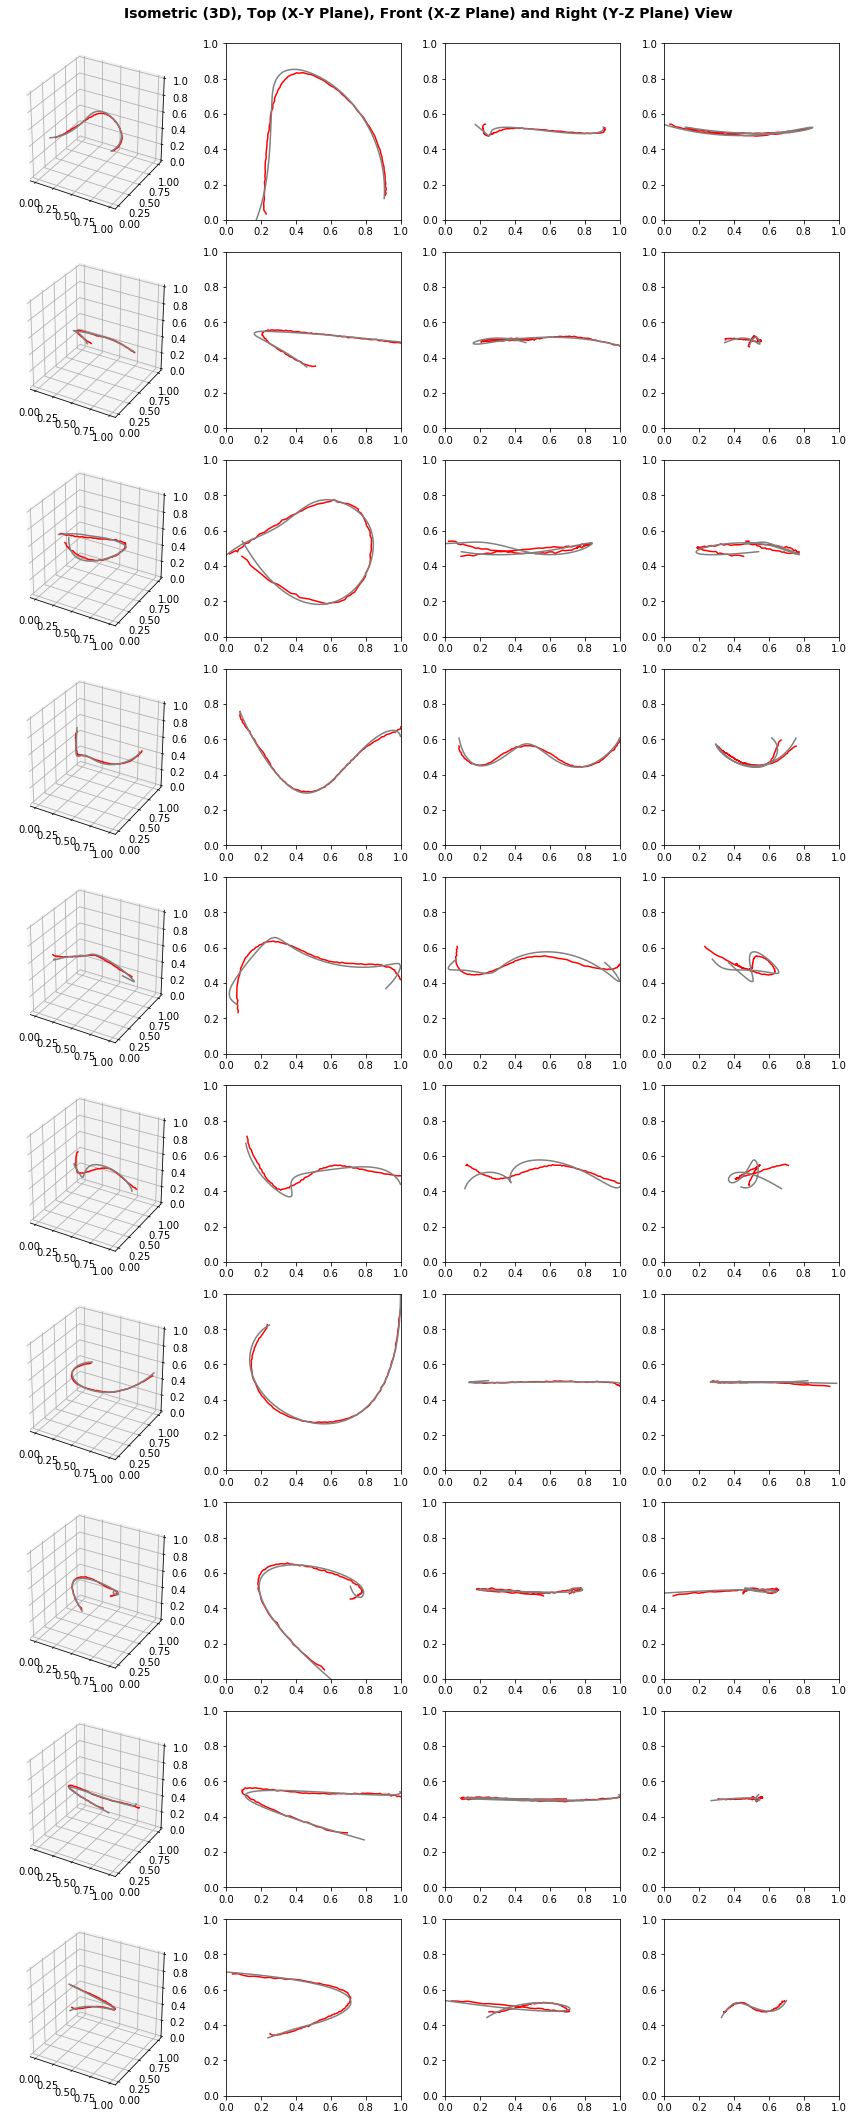

In [46]:
AE,E,train_data =AE_analysis(aeZ15, 10, x_train, x_test, filename='Z15')
visualize_AE(AE, train_data, x_test)

## 2.5 Autoencoder Z=30

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00183: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00171: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00405: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00301: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00338: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00248: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00197: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00353: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00294: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00136: early stopping
*************************************************

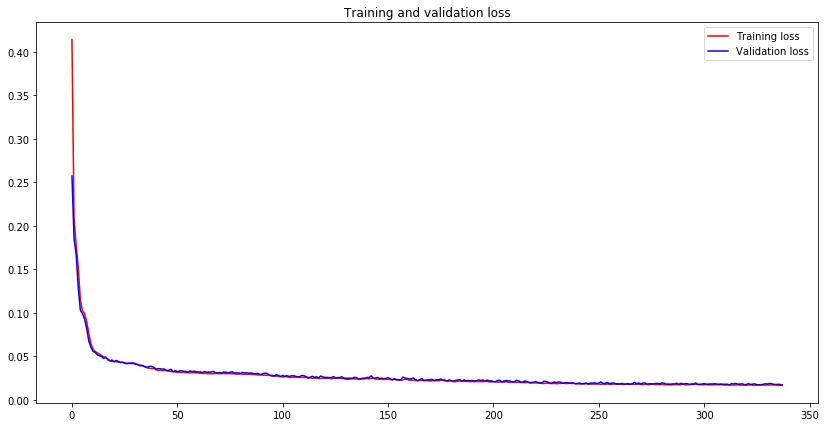

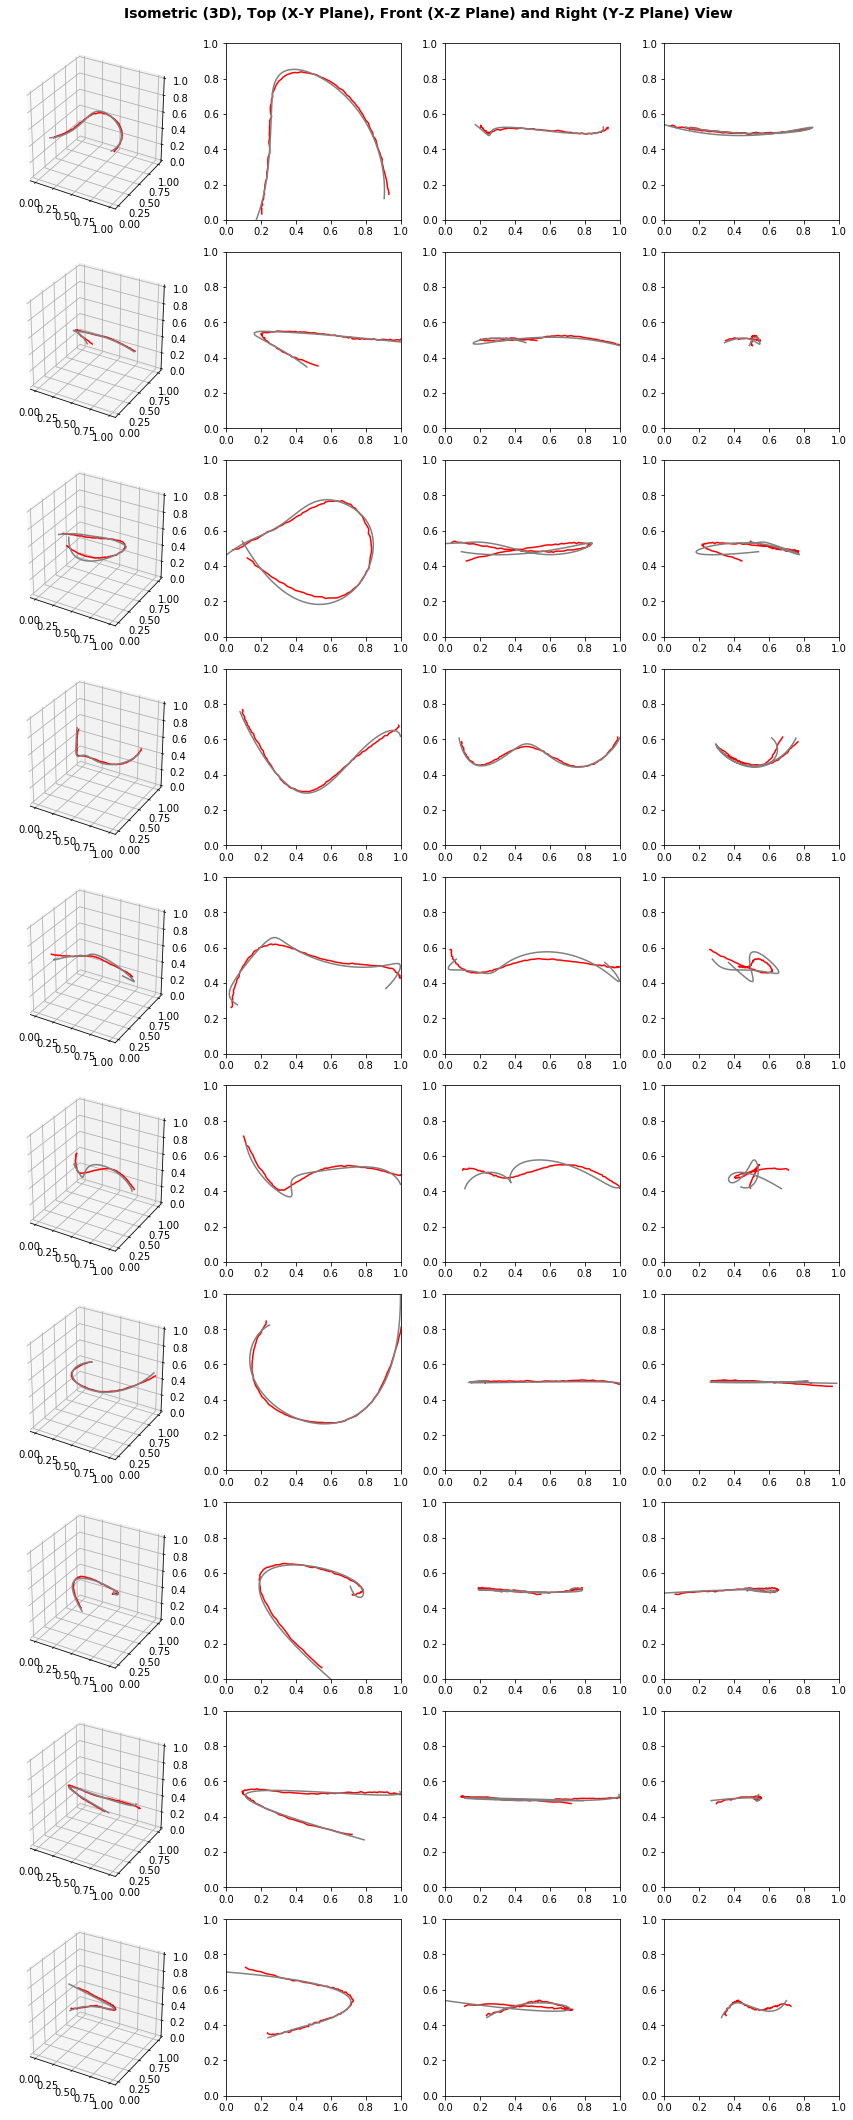

In [47]:
AE,E,train_data =AE_analysis(aeZ30, 10, x_train, x_test, filename='Z30')
visualize_AE(AE, train_data, x_test)

## 2.6 Autoencoder Z=60

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00274: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00370: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00120: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00175: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00259: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00400: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00332: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00155: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00239: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00340: early stopping
*************************************************

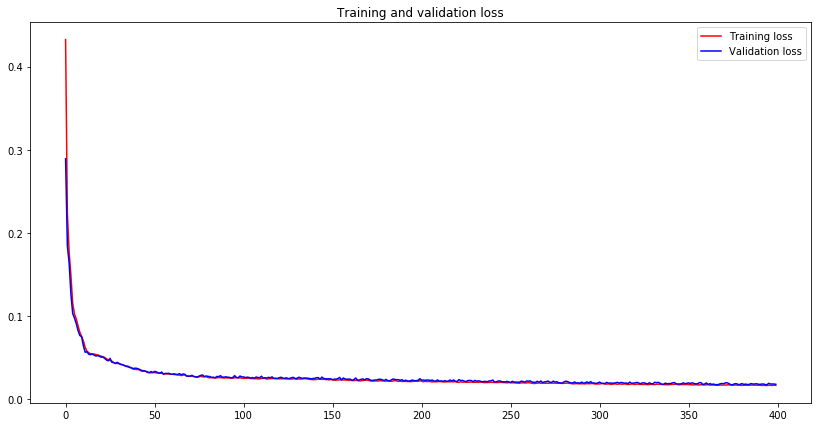

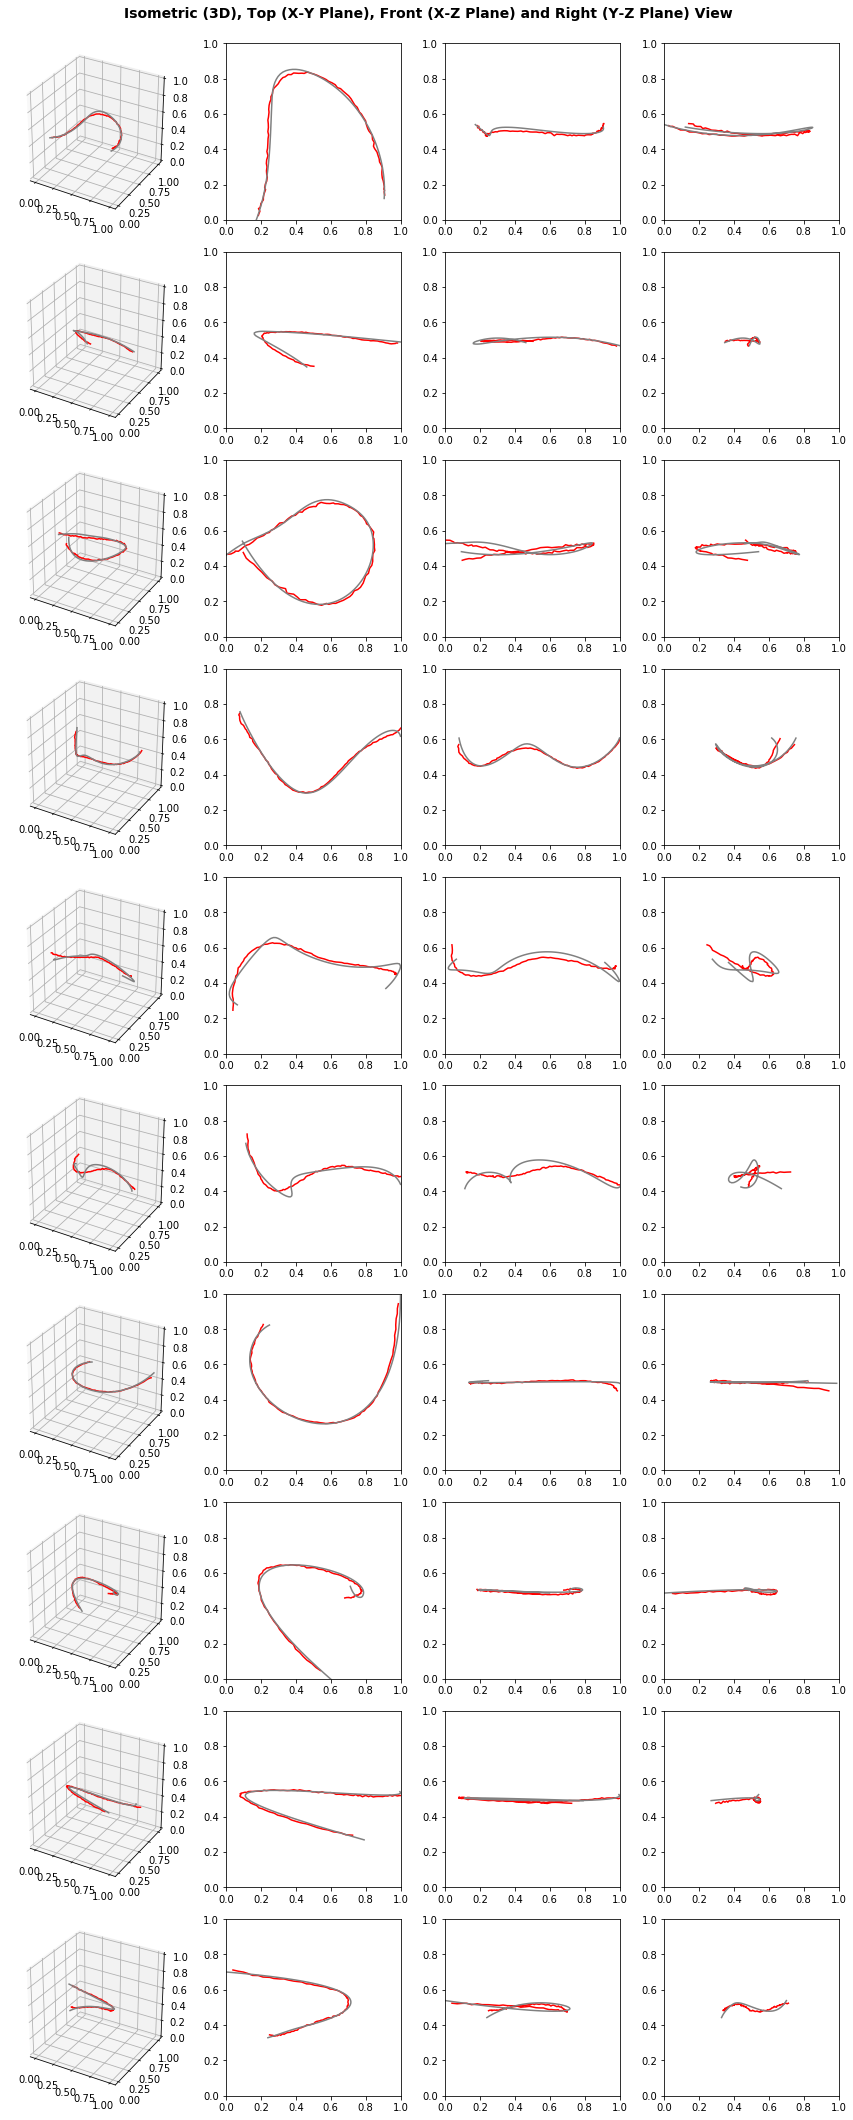

In [48]:
AE,E,train_data =AE_analysis(aeZ60, 10, x_train, x_test, filename='Z60')
visualize_AE(AE, train_data, x_test)

## 2.7 AutoEncoder Z=300

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00302: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00238: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00271: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00127: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00343: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00156: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00145: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00294: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00133: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00314: early stopping
*************************************************

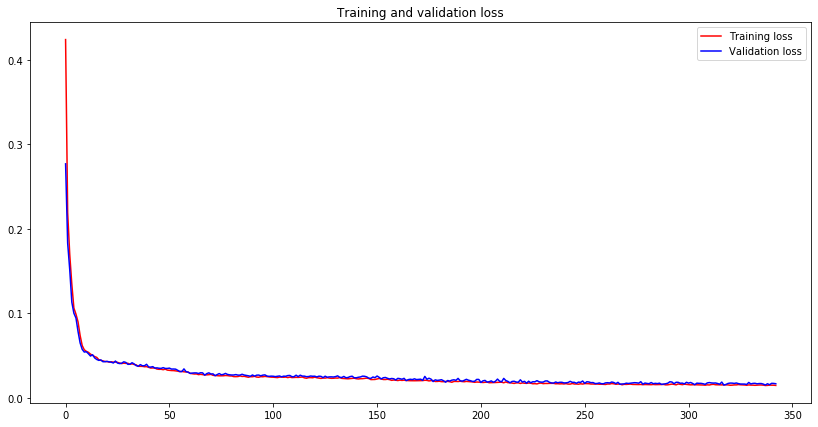

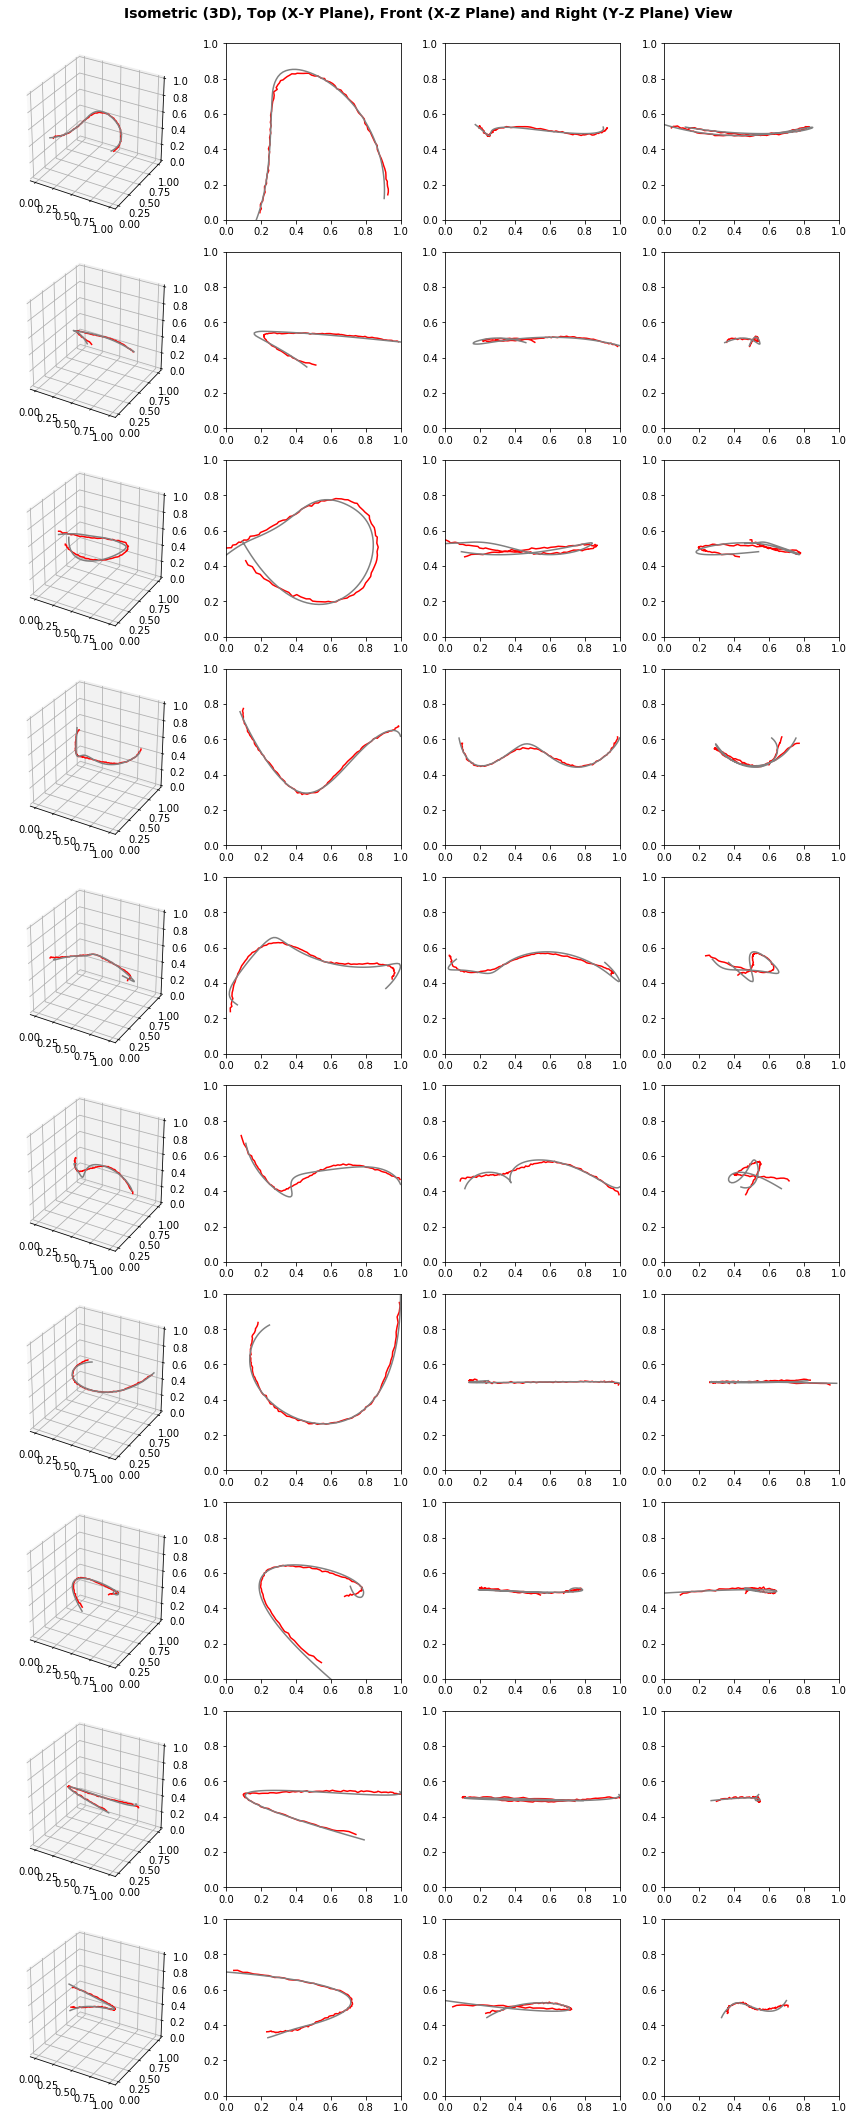

In [49]:
AE,E,train_data =AE_analysis(aeZ300, 10, x_train, x_test, filename='Z300')
visualize_AE(AE, train_data, x_test)

# 3. Effect of Depth on AutoEncoders

As the depth of an autoencoder increases, it can capture more complex relationships in the data. 

## 3.1 Autoencoder Depth=1

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00280: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00412: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00333: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00310: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00363: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00280: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00258: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00212: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00269: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00217: early stopping
*************************************************

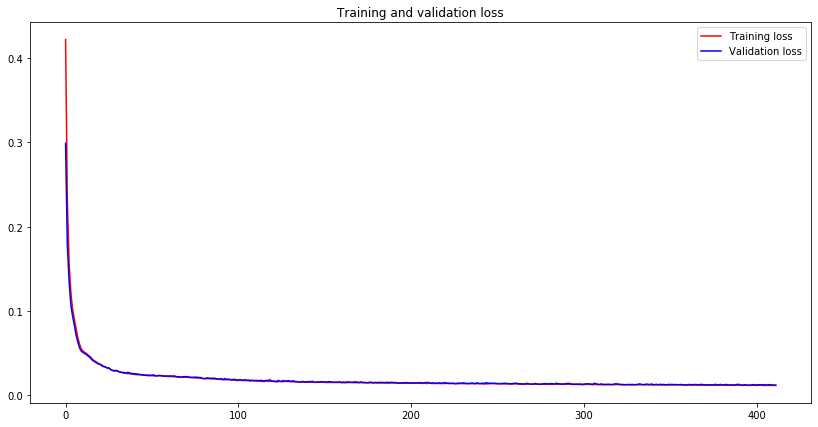

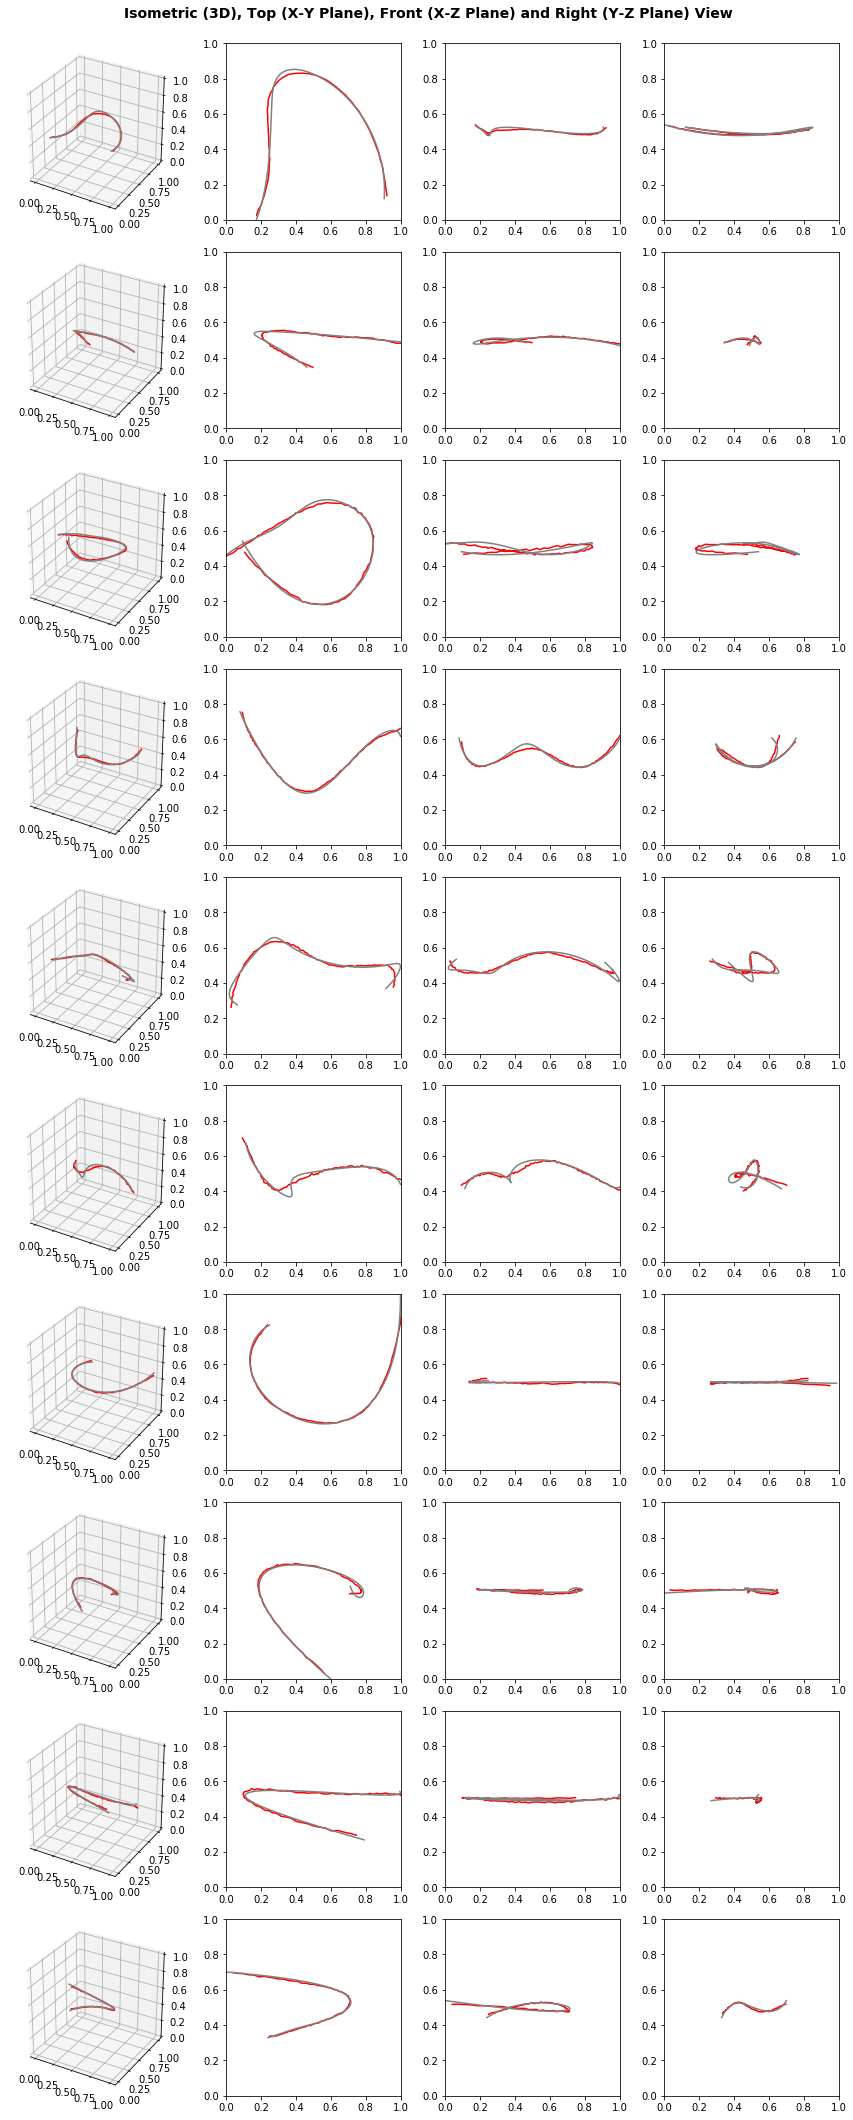

In [50]:
#resetRNG(0)
AE,E,train_data =AE_analysis(aeDepth1, 10, x_train, x_test, filename='D1')
visualize_AE(AE, train_data, x_test)

## 3.1 Autoencoder Depth=5

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00240: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00339: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00193: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00233: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00310: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00328: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00277: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00315: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00216: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00389: early stopping
*************************************************

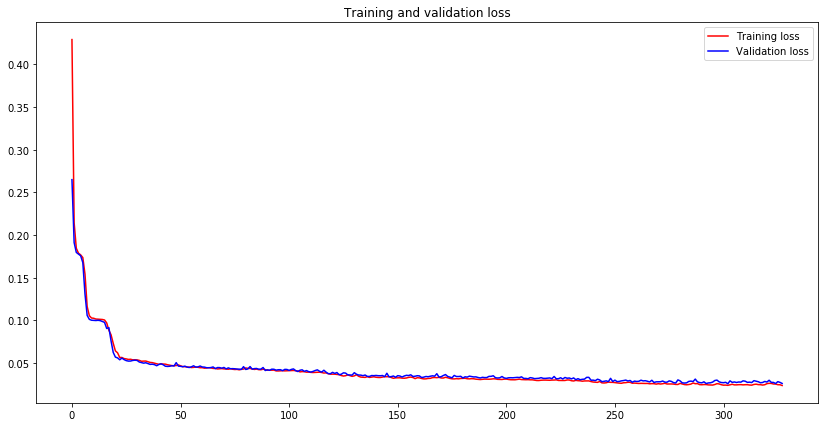

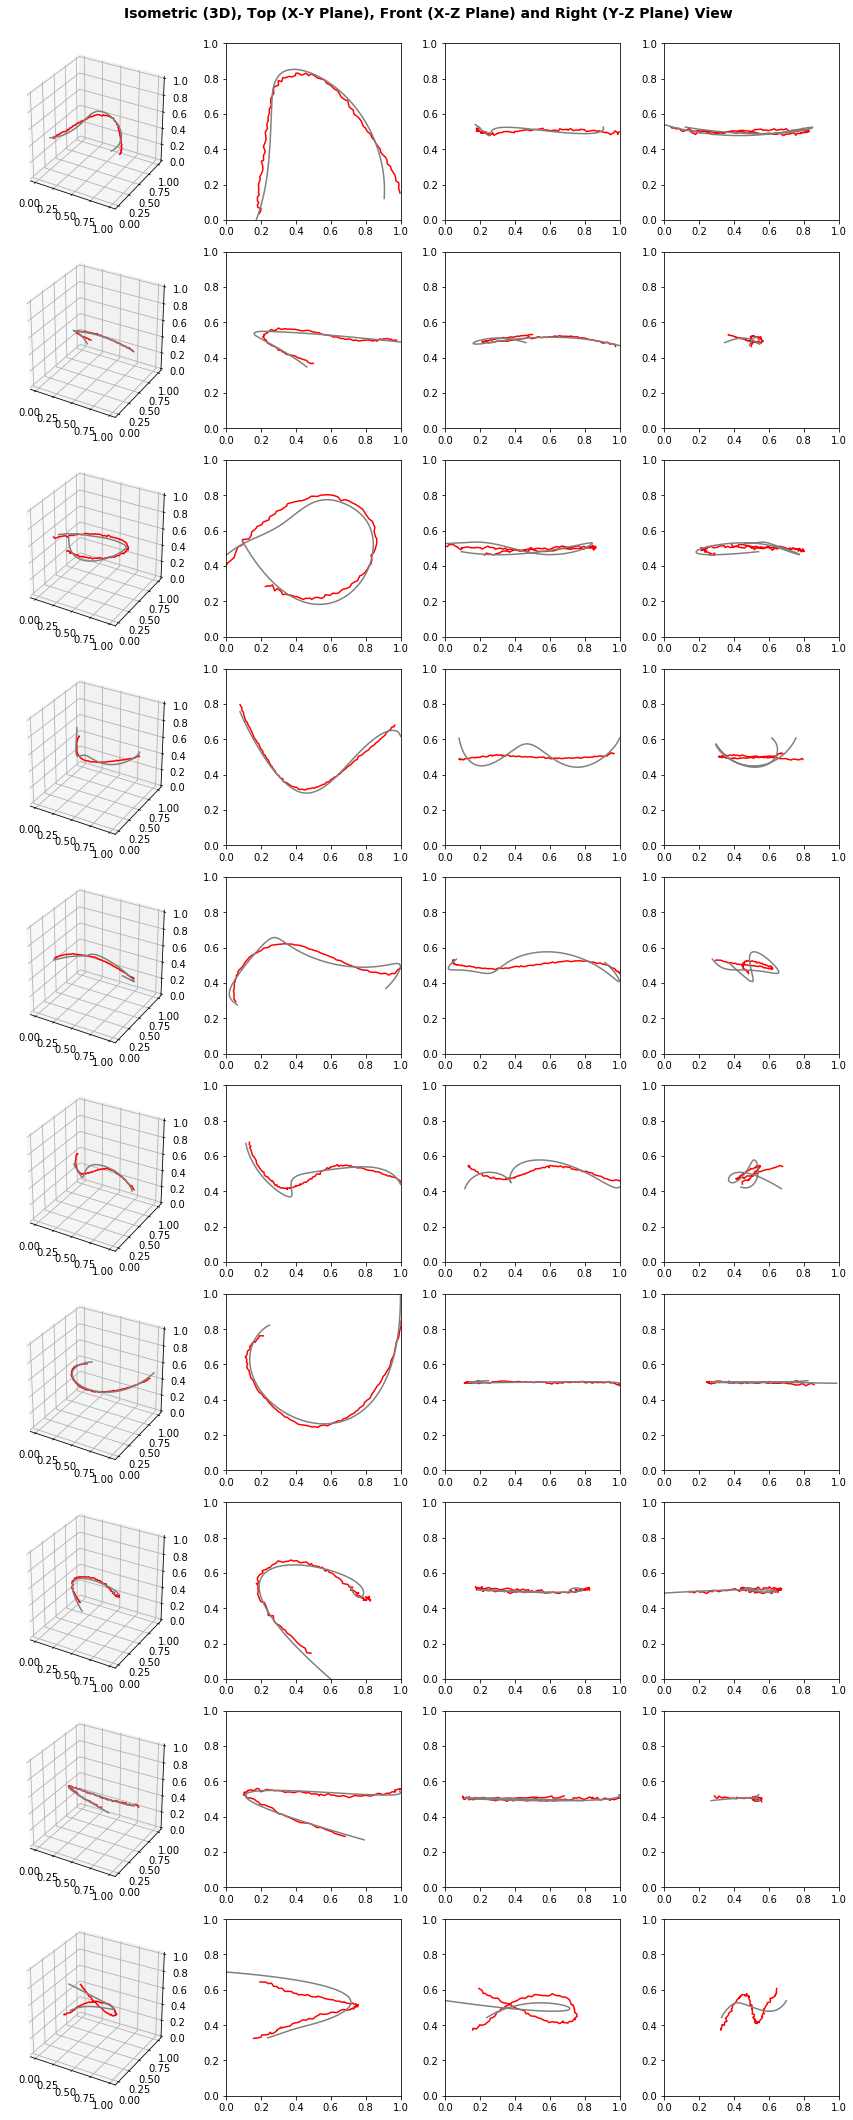

In [51]:
#resetRNG(0)
AE,E,train_data =AE_analysis(aeDepth5, 10, x_train, x_test, filename='D5')
visualize_AE(AE, train_data, x_test)

# 4. Effect of Regularization

Regularizing the bottleneck layer enforces the z-space to be better behaved i.e. the output range is smaller. This leads to 'reduced activity' in z-space and the model generalizes better and avoids overfitting. However, the validation loss for each model increases by increasing regularization due to added regularization term in the cost function. Thus, optimal regularization parameter needs to be emperically explored.

We use l1 regularizer scaled by a constant factor $\lambda=10^{-7}$ in our implementation.

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00038: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00031: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00417: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00283: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00352: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00454: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00238: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00415: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00277: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00251: early stopping
*************************************************

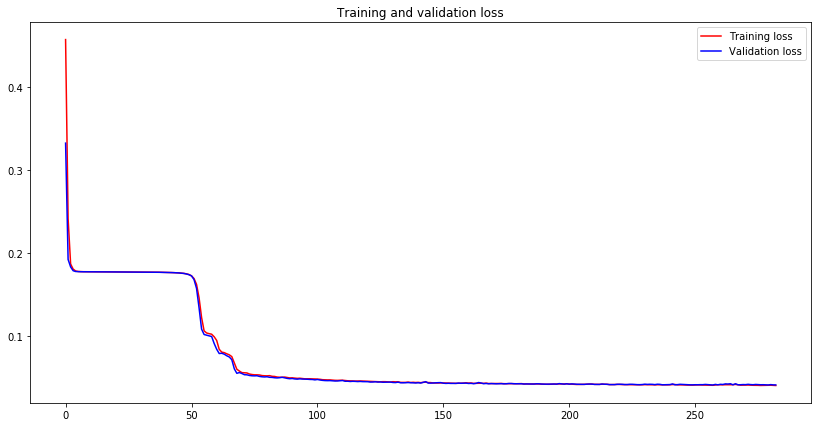

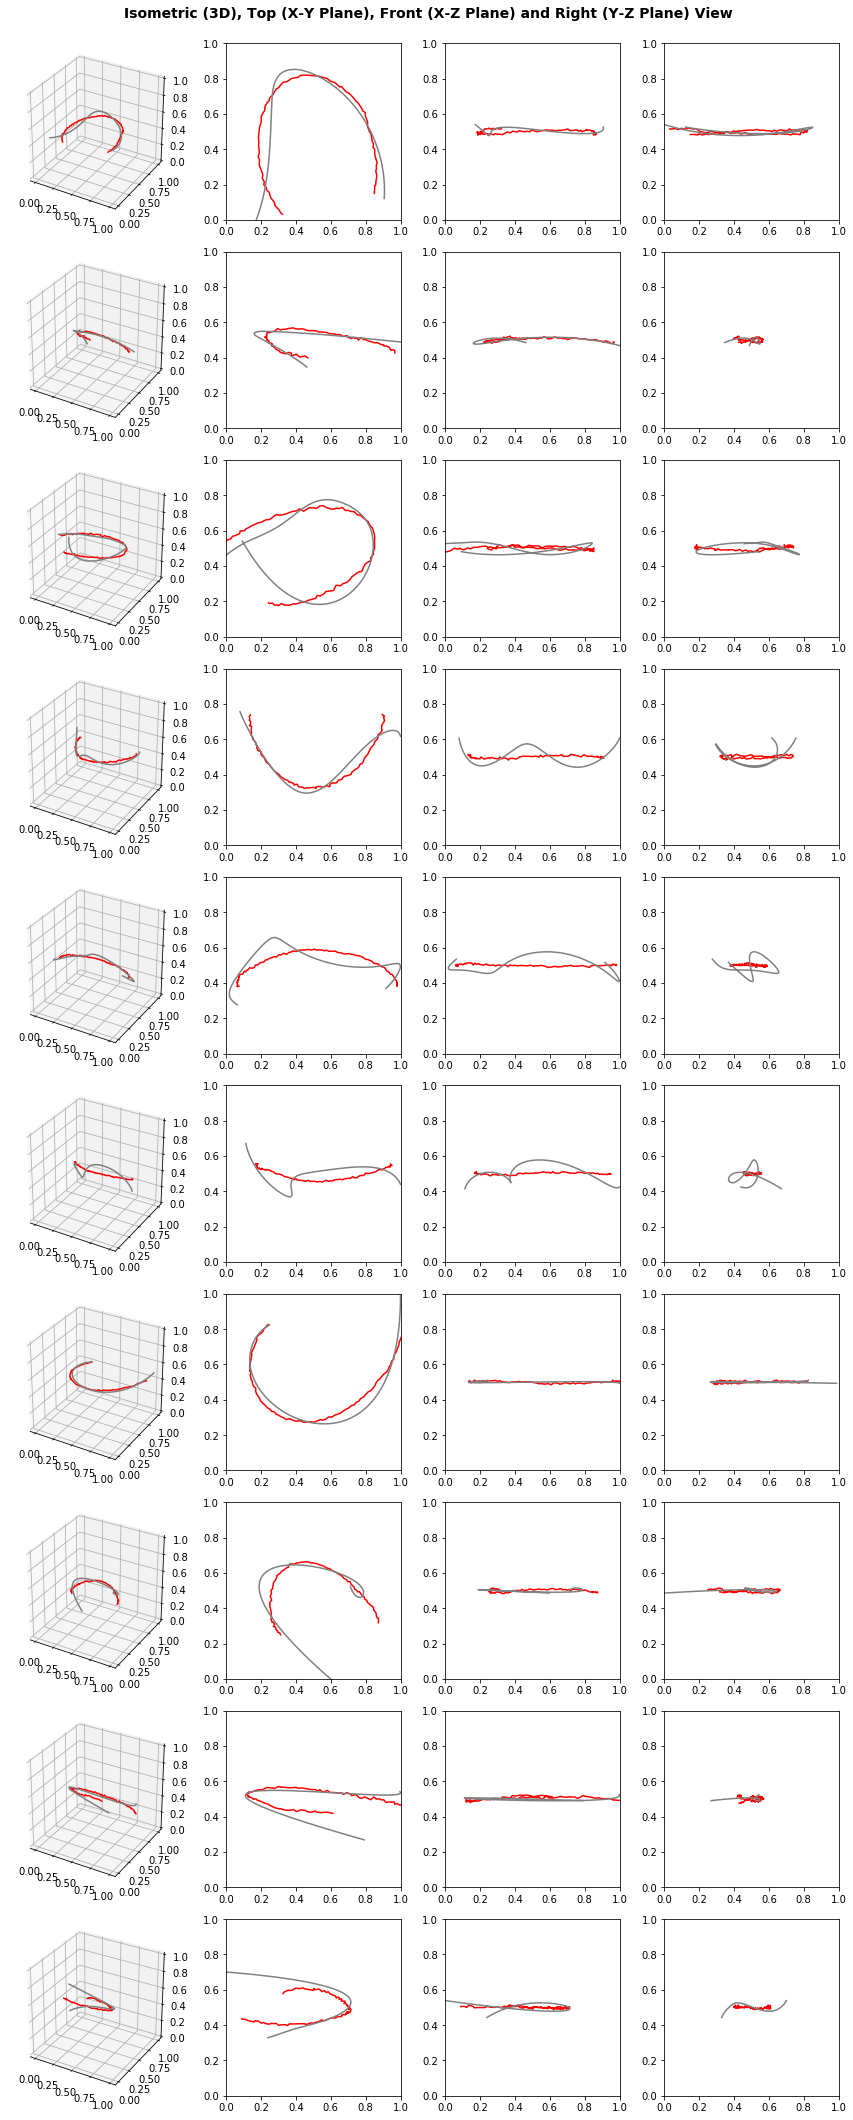

In [52]:
#resetRNG(0)
AE,E,train_data =AE_analysis(aeReg, 10, x_train, x_test, filename='Reg')
visualize_AE(AE, train_data, x_test)

In [0]:
# Load Autoencoder model with Z=3
def loadAE(filename, bottleneckIndex):
  path=os.path.join('models',filename)
  AE = load_model(path, custom_objects={'rmse': rmse})
  E = Model(AE.input, AE.layers[bottleneckIndex].output)
  E.summary()

  return AE, E

def plotZspace(E, x_train, x_test):
    # Calculate z space descriptors
    z_train = E.predict(x_train)
    z_test = E.predict(x_test)
    
    fig = plt.figure(figsize=3/2*plt.figaspect(1/2))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(z_train[:,0],z_train[:,1],z_train[:,2])
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(z_test[:,0],z_test[:,1],z_test[:,2])

    plt.tight_layout()
    plt.show()

    print('Mean train activation: '+str(z_train.mean()))
    print('Mean train activation: '+str(z_test.mean()))


Model: "model_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_184 (InputLayer)       (None, 100, 3)            0         
_________________________________________________________________
flatten_184 (Flatten)        (None, 300)               0         
_________________________________________________________________
dense_1345 (Dense)           (None, 150)               45150     
_________________________________________________________________
dense_1346 (Dense)           (None, 100)               15100     
_________________________________________________________________
dense_1347 (Dense)           (None, 70)                7070      
_________________________________________________________________
dense_1348 (Dense)           (None, 3)                 213       
Total params: 67,533
Trainable params: 67,533
Non-trainable params: 0
_____________________________________________________

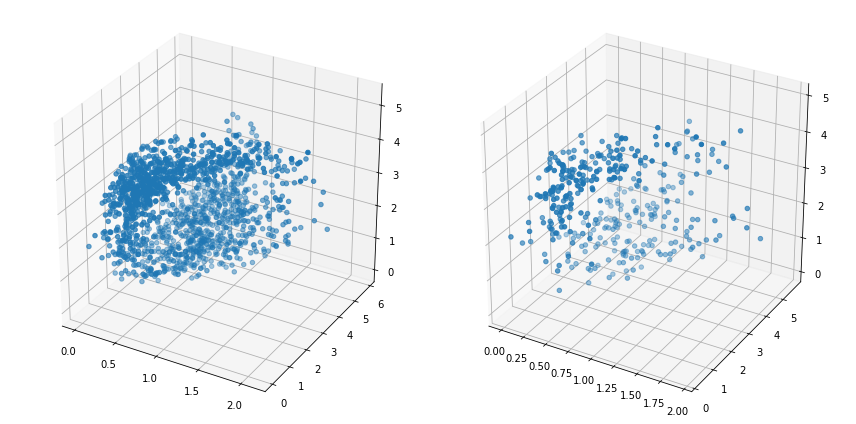

Mean train activation: 1.9555179
Mean train activation: 1.9410259


In [61]:
AE_Z3,E_Z3=loadAE('AE_Z3_val_loss_0.0406.h5',5)
plotZspace(E_Z3, x_train, x_test)

Model: "model_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_264 (InputLayer)       (None, 100, 3)            0         
_________________________________________________________________
flatten_264 (Flatten)        (None, 300)               0         
_________________________________________________________________
dense_1985 (Dense)           (None, 150)               45150     
_________________________________________________________________
dense_1986 (Dense)           (None, 100)               15100     
_________________________________________________________________
dense_1987 (Dense)           (None, 70)                7070      
_________________________________________________________________
dense_1988 (Dense)           (None, 3)                 213       
Total params: 67,533
Trainable params: 67,533
Non-trainable params: 0
_____________________________________________________

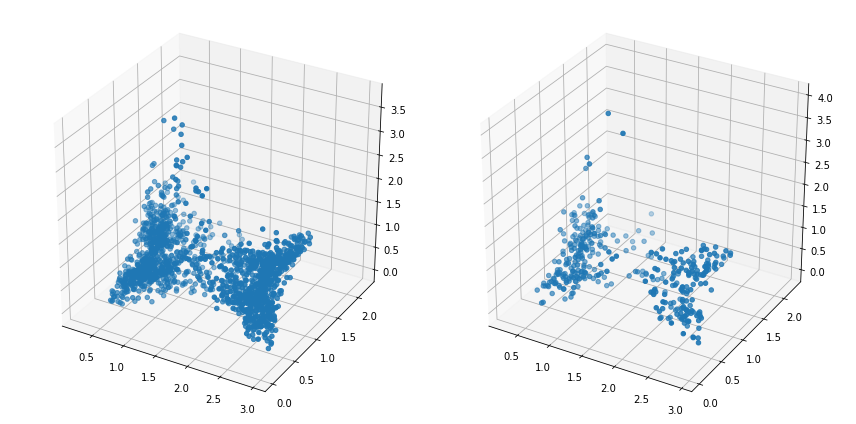

Mean train activation: 1.0998032
Mean train activation: 1.0719163


In [62]:
AE_RZ3,E_RZ3=loadAE('AE_Reg_val_loss_0.0408.h5',5)
plotZspace(E_RZ3, x_train, x_test)

# OLD Observations with MSE loss

In this section, we recap the Validation losses observed in learning using different Autoencoder architectures.

### 1. Effect of activation layer
| Activation Function | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| Sigmoid             | 0.0067               | 0.0053
| RELU                | 0.0022               | 0.0015
| LeakyRELU           | 0.0053               | 0.0040

It is intresting to note that the Sigmoid function takes longer to train and runs for significantly more epochs (440 epochs) before converging when compared to relu

### 2. Effect of z-space dimension
| Z-Space Dimension   | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| 2                   | 0.1232               | 0.0610
| 3                   | 0.0531               | 0.0393
| 10                  | 0.0187               | 0.0154
| 15                  | 0.0133               | 0.0107
| 30                  | 0.0059               | 0.0051
| 60                  | 0.0031               | 0.0025
| 300                 | 0.0023               | 0.0019

Reconstruction losses for Z=2,3,10,15 are significant. However, we don't observe a lot of improvement in reconstructed results after Z=30. Thus, exploring architectures with Z=30 seems to be the sweet spot. This is in agreement with our intuition since these paths are created by 5ss mechanisms which are defined using 33 parameters.

### 3. Effect of regularization
| Model Type          | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| z=3 Regularized     | 0.0535               | 0.0414
| z=3 Unregularized   | 0.0531               | 0.0393

Although regularization increase the validation loss, it imparts desirable qualities to the z-space parameters.

### 4. Effect of depth
| Model Type          | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| z=30 Reg Deep       | 0.0244               | 0.0205
| z=30 Unreg Deep     | 0.0216               | 0.0190
| z=30 Reg Shallow    | 0.0061               | 0.0055
| z=30 Unreg Shallow  | 0.0011               | 0.0024

These results are unexpected. It is observed that the autoencoder performs better when it is shallow and worse when it is deep. Needs further investigation. Might be due to the use of RELU activation on data normalized to roughly -3.5 and 3.5 range.